<a href="https://colab.research.google.com/github/anuskhattak/ML-Project/blob/main/ForestCover_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590,56,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804,139,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785,155,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595,45,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


# **Data Cleaning And Processing**

In [ ]:
df.shape

(478327, 55)

In [ ]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,478327.000000,478327.000000,478326.000000,478326.00000,478326.000000,478326.000000,478326.00000,478326.000000,478326.000000,478326.000000,...,478326.000000,478326.000000,478326.000000,478326.000000,478326.000000,478326.000000,478326.000000,478326.000000,478326.000000,478326.000000
mean,2942.072614,153.054611,13.681282,262.95032,45.018918,2486.462195,212.74781,223.337278,142.166088,2041.627520,...,0.088864,0.059537,0.001476,0.001771,0.000249,0.000623,0.027619,0.019913,0.011963,2.069250
std,277.493047,111.718102,7.473722,207.84812,55.835857,1607.694072,26.46739,19.547523,37.620584,1381.171386,...,0.284548,0.236627,0.038390,0.042043,0.015771,0.024952,0.163879,0.139702,0.108717,1.379462
min,1859.000000,0.000000,0.000000,0.00000,-159.000000,0.000000,0.00000,30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2801.000000,57.000000,8.000000,108.00000,7.000000,1187.000000,200.00000,213.000000,120.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2978.000000,122.000000,12.000000,216.00000,29.000000,2148.000000,218.00000,226.000000,143.000000,1761.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3133.000000,257.000000,18.000000,376.00000,66.000000,3550.000000,231.00000,237.000000,167.000000,2639.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3849.000000,360.000000,64.000000,1397.00000,601.000000,7117.000000,254.00000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478327 entries, 0 to 478326
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           478327 non-null  int64  
 1   Aspect                              478327 non-null  int64  
 2   Slope                               478326 non-null  float64
 3   Horizontal_Distance_To_Hydrology    478326 non-null  float64
 4   Vertical_Distance_To_Hydrology      478326 non-null  float64
 5   Horizontal_Distance_To_Roadways     478326 non-null  float64
 6   Hillshade_9am                       478326 non-null  float64
 7   Hillshade_Noon                      478326 non-null  float64
 8   Hillshade_3pm                       478326 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  478326 non-null  float64
 10  Wilderness_Area1                    478326 non-null  float64
 11  Wilderness_Area2          

In [ ]:
null_counts = df.isnull().sum()
null_counts

,0
Elevation,0
Aspect,0
Slope,1
Horizontal_Distance_To_Hydrology,1
Vertical_Distance_To_Hydrology,1
Horizontal_Distance_To_Roadways,1
Hillshade_9am,1
Hillshade_Noon,1
Hillshade_3pm,1
Horizontal_Distance_To_Fire_Points,1


In [ ]:
total_null = null_counts.sum()
total_null

np.int64(53)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [ ]:
zero_variance_cols = ['Soil_Type7', 'Soil_Type15']
df.drop(columns=zero_variance_cols, inplace=True)
print(zero_variance_cols)
print(df.shape)

['Soil_Type7', 'Soil_Type15']
(478326, 53)


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
Elevation,int64
Aspect,int64
Slope,float64
Horizontal_Distance_To_Hydrology,float64
Vertical_Distance_To_Hydrology,float64
Horizontal_Distance_To_Roadways,float64
Hillshade_9am,float64
Hillshade_Noon,float64
Hillshade_3pm,float64
Horizontal_Distance_To_Fire_Points,float64


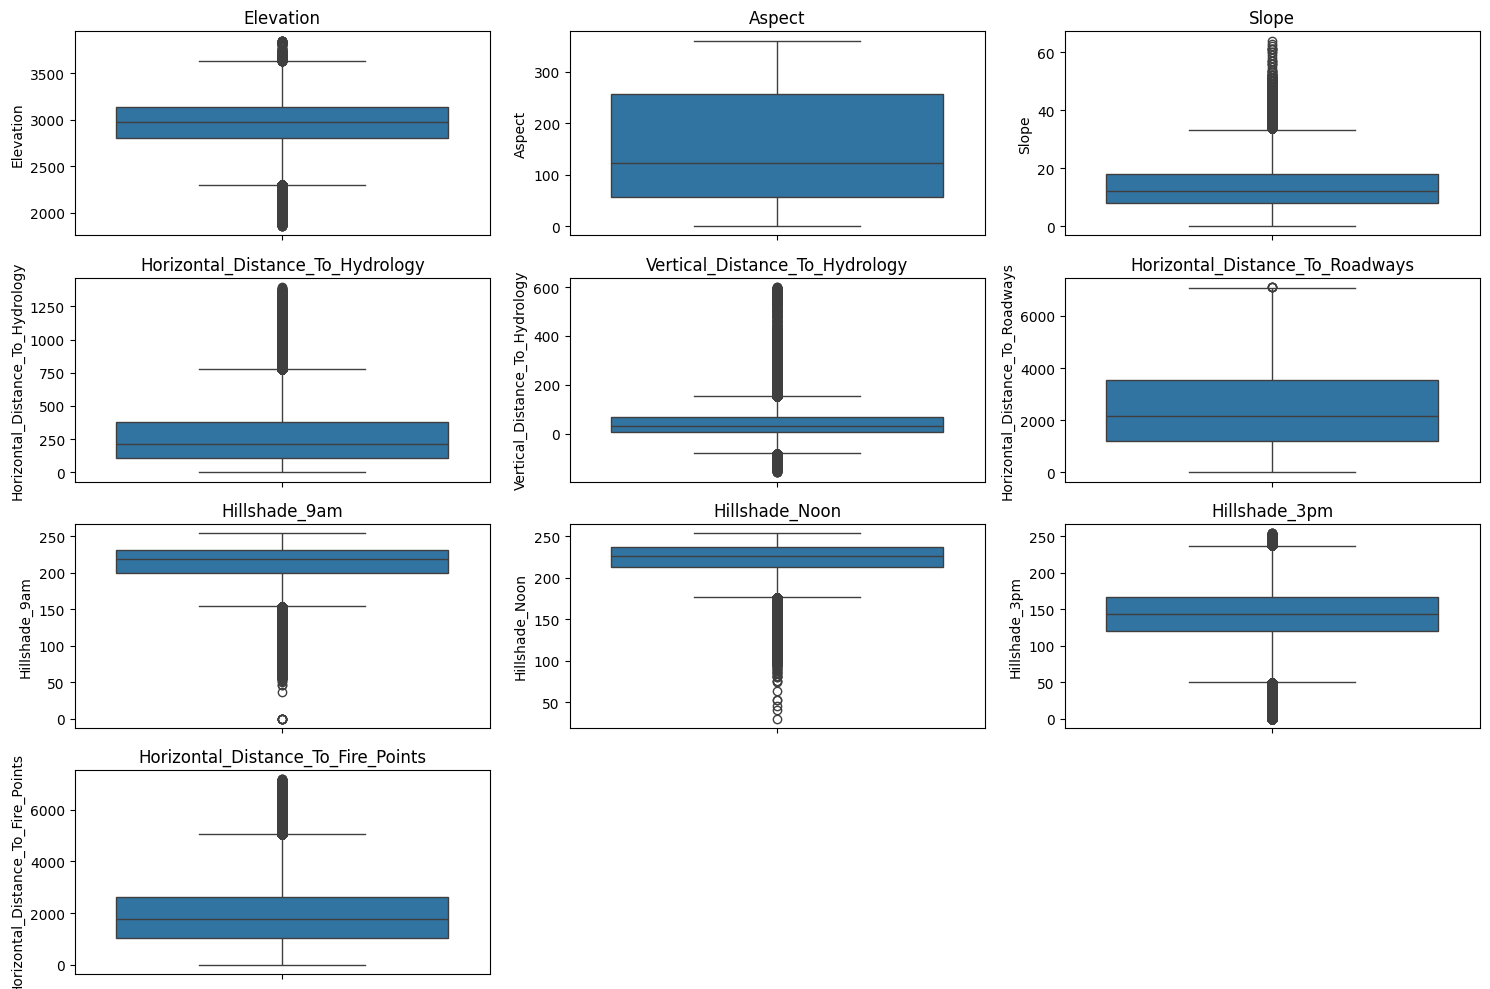

In [ ]:
numerical_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                 'Horizontal_Distance_To_Fire_Points']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"{col} mein outliers ki tadaad: {len(outliers)}")

Elevation mein outliers ki tadaad: 17624
Aspect mein outliers ki tadaad: 0
Slope mein outliers ki tadaad: 7737
Horizontal_Distance_To_Hydrology mein outliers ki tadaad: 12341
Vertical_Distance_To_Hydrology mein outliers ki tadaad: 26733
Horizontal_Distance_To_Roadways mein outliers ki tadaad: 4
Hillshade_9am mein outliers ki tadaad: 18277
Hillshade_Noon mein outliers ki tadaad: 13212
Hillshade_3pm mein outliers ki tadaad: 8403
Horizontal_Distance_To_Fire_Points mein outliers ki tadaad: 25744


In [ ]:
# Remove Outliers
numerical_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                  'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                  'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                  'Horizontal_Distance_To_Fire_Points']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f'{col} {df.shape}')
print(df.shape)

Elevation (460702, 53)
Aspect (460702, 53)
Slope (450445, 53)
Horizontal_Distance_To_Hydrology (439853, 53)
Vertical_Distance_To_Hydrology (417226, 53)
Horizontal_Distance_To_Roadways (417226, 53)
Hillshade_9am (405614, 53)
Hillshade_Noon (396688, 53)
Hillshade_3pm (394439, 53)
Horizontal_Distance_To_Fire_Points (371859, 53)
(371859, 53)


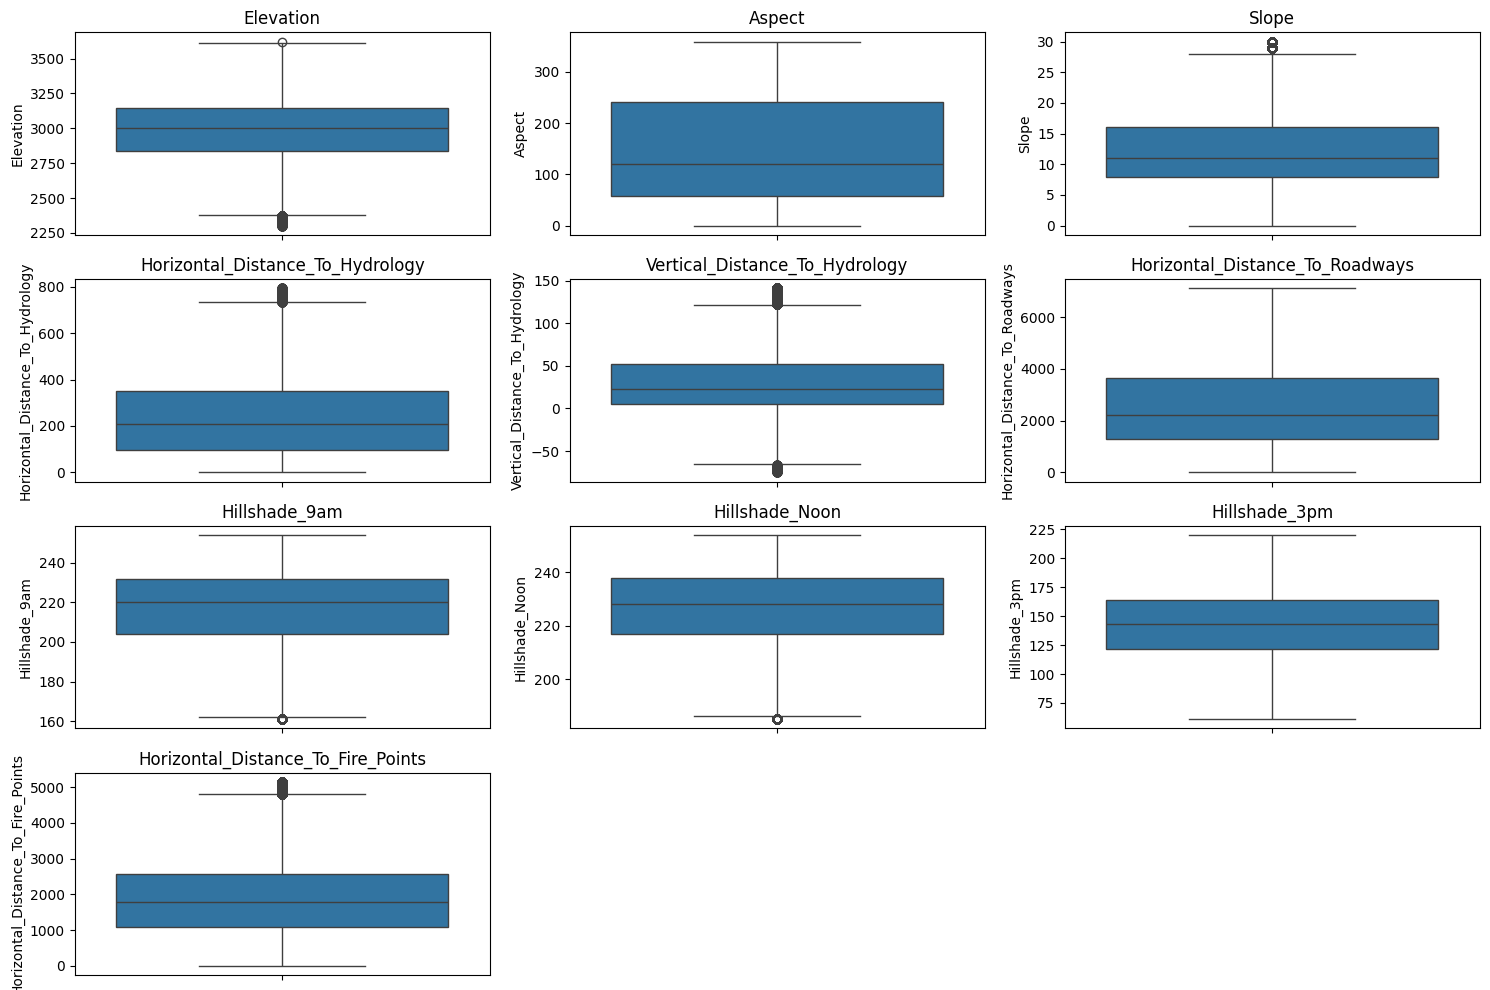

In [ ]:
numerical_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                 'Horizontal_Distance_To_Fire_Points']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
df['Cover_Type'] = df['Cover_Type'].astype(int)

In [ ]:
soil_cols = [col for col in df.columns if 'Soil_Type' in col]
wild_cols = [col for col in df.columns if 'Wilderness_Area' in col]


df[soil_cols] = df[soil_cols].astype(int)
df[wild_cols] = df[wild_cols].astype(int)

In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
df.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
478321,3109,12,7.0,190.0,14.0,1530.0,213.0,226.0,150.0,1307.0,...,0,0,0,0,0,0,0,0,0,2
478322,3109,16,7.0,162.0,12.0,1510.0,214.0,226.0,148.0,1312.0,...,0,0,0,0,0,0,0,0,0,2
478323,3107,18,7.0,134.0,10.0,1487.0,215.0,226.0,148.0,1318.0,...,0,0,0,0,0,0,0,0,0,2
478324,3106,11,6.0,108.0,6.0,1465.0,214.0,228.0,151.0,1324.0,...,0,0,0,0,0,0,0,0,0,2
478325,3106,5,6.0,85.0,4.0,1443.0,213.0,229.0,154.0,1332.0,...,0,0,0,0,0,0,0,0,0,2


## **ML**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import xgboost as XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score,classification_report


In [ ]:
numerical_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                  'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                  'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                  'Horizontal_Distance_To_Fire_Points']

In [ ]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
print(X.shape, y.shape)

(371859, 52) (371859,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42 )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(297487, 52) (297487,)
(74372, 52) (74372,)


# **Random Forest**

In [ ]:
random_for = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
random_for.fit(X_train, y_train)
print('Random Forest Trained!')

Random Forest Trained!


In [ ]:
rf_pred = random_for.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
print(rf_accuracy)
print("Random Forest F1 Score:", rf_f1)
print(classification_report(y_test, rf_pred))

0.9519173882644005
Random Forest F1 Score: 0.9516332791295519
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     27892
           2       0.95      0.97      0.96     38655
           3       0.93      0.93      0.93      2441
           4       0.85      0.70      0.77        80
           5       0.93      0.75      0.83      1342
           6       0.91      0.90      0.90      1634
           7       0.97      0.94      0.95      2328

    accuracy                           0.95     74372
   macro avg       0.93      0.88      0.90     74372
weighted avg       0.95      0.95      0.95     74372



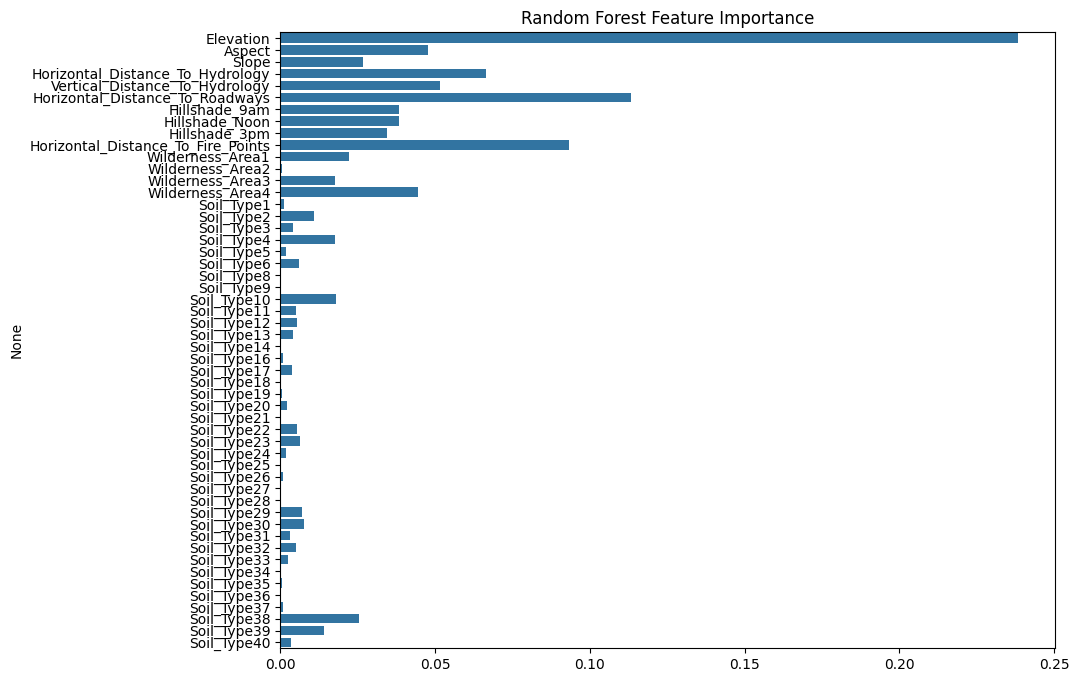

In [ ]:
rf_importances = random_for.feature_importances_
rf_features = X.columns

plt.figure(figsize=(10, 8))
sns.barplot(x=rf_importances, y=rf_features)
plt.title('Random Forest Feature Importance')
plt.show()

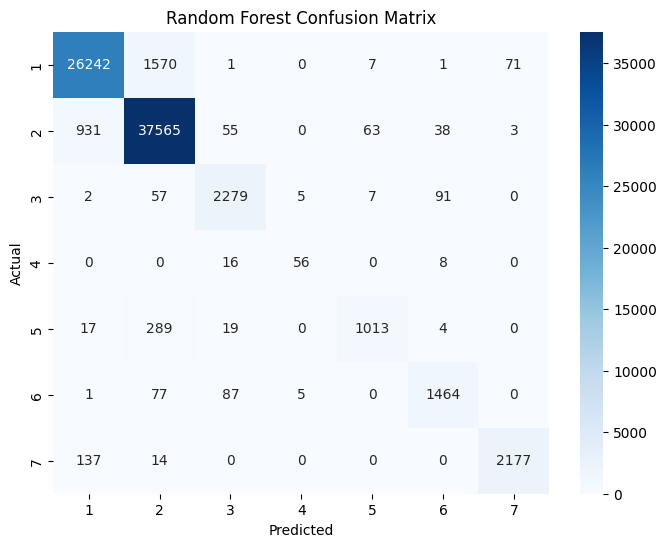

In [ ]:
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1,8), yticklabels=range(1,8))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **XGBoost Train and Predict**

In [ ]:
xgb_model = xgb.XGBClassifier(objective='multi:softprob',
                              n_estimators=100,
                              random_state=42,
                              class_weight='balanced')
xgb_model.fit(X_train, y_train - 1)
print('XGB_Boost Trained')

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:52:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGB_Boost Trained


In [ ]:
xg = xgb_model.predict(X_test) + 1
xgb_accuracy = accuracy_score(y_test, xg)
xgb_f1 = f1_score(y_test, xg, average='weighted')
print(xgb_accuracy)
print("XGBoost F1 Score:", xgb_f1)
print(classification_report(y_test, xg))

0.8894207497445276
XGBoost F1 Score: 0.8886932653129033
              precision    recall  f1-score   support

           1       0.89      0.85      0.87     27892
           2       0.89      0.92      0.90     38655
           3       0.90      0.91      0.91      2441
           4       0.84      0.78      0.81        80
           5       0.87      0.62      0.72      1342
           6       0.88      0.88      0.88      1634
           7       0.95      0.91      0.93      2328

    accuracy                           0.89     74372
   macro avg       0.89      0.84      0.86     74372
weighted avg       0.89      0.89      0.89     74372



Visualize Confusion Matrix for XGBoost


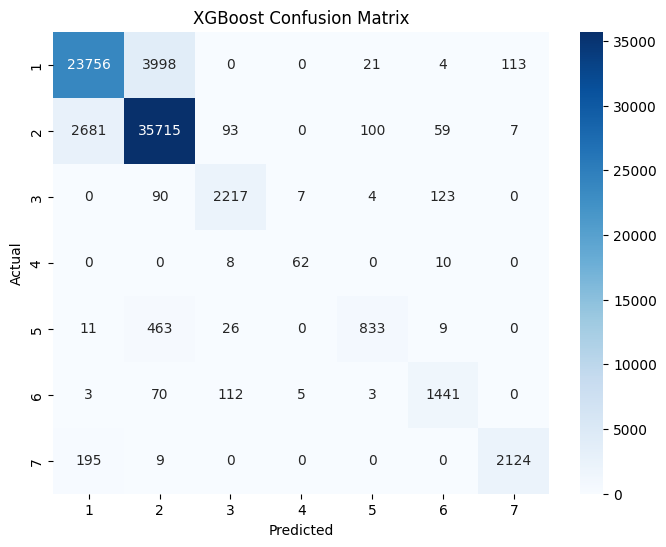

In [ ]:
cm = confusion_matrix(y_test, xg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1,8), yticklabels=range(1,8))
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

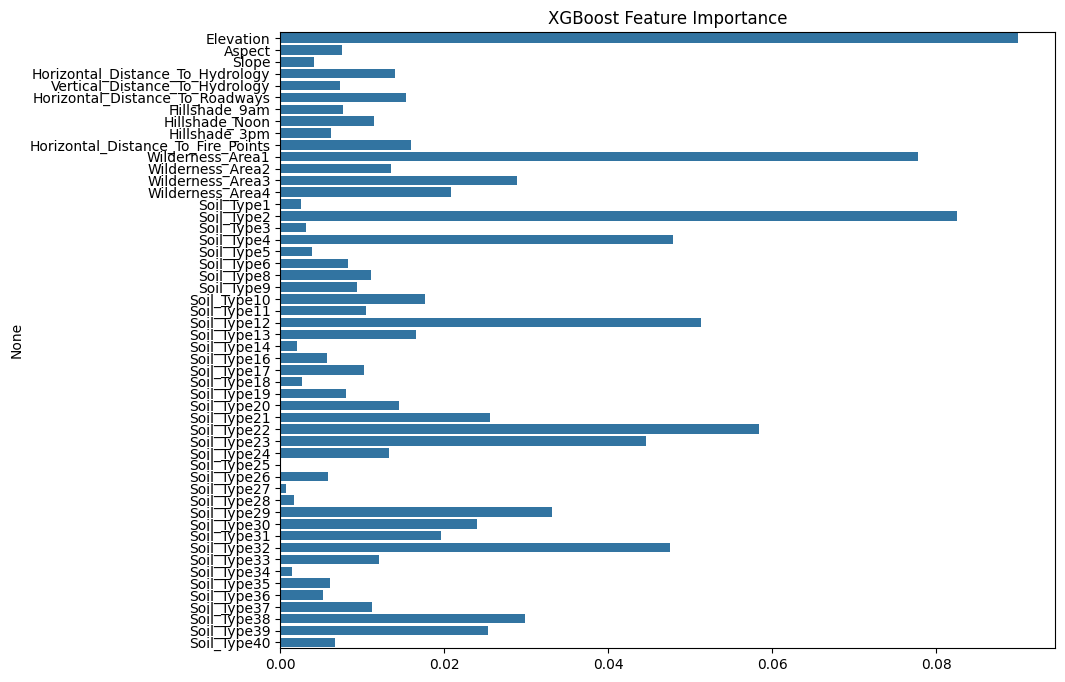

In [ ]:
importances = xgb_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 8))
sns.barplot(x=importances, y=features)
plt.title('XGBoost Feature Importance')
plt.show()

In [ ]:
comparison = pd.DataFrame({
    'Model' : ['Random Forest', 'XGBoost'],
    'Accuracy' : [accuracy_score(y_test, rf_pred), accuracy_score(y_test, xg)]

})
print(comparison)

           Model  Accuracy
0  Random Forest  0.951917
1        XGBoost  0.889421
